In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## pandas' describe() function

$$X \sim \mathcal N(1,2^2)$$

In [18]:
x = 1.0 + 2.0 * np.random.randn(1000)

In [19]:
dataset = pd.DataFrame(x)

In [20]:
dataset.head()

0
0  0.119769
1  3.790154
2 -3.263877
3  0.368364
4  3.845511

In [21]:
dataset.describe()

0
count  1000.000000
mean      1.043655
std       2.029843
min      -5.342028
25%      -0.206373
50%       1.072328
75%       2.276932
max       7.773477

$$\mathrm{count} \leftrightarrow N$$
$$\mathrm{mean} \leftrightarrow \bar{X}, \ \mathrm{std} \leftrightarrow s$$
$$ 25\% \leftrightarrow Q_1, \ 50\% \leftrightarrow M \equiv Q_2,\ 75\% \leftrightarrow Q_3$$

## Μέτρα Ασυμμετρίας

Μέτρο ασυμμετρίας Pearson
$$\tilde{Sk}_p = \frac{3(\bar{X}-M)}{s}$$

In [22]:
dataset.mean()

0    1.043655
dtype: float64

In [23]:
dataset.median()

0    1.072328
dtype: float64

In [24]:
dataset.std()

0    2.029843
dtype: float64

In [25]:
pearson = 3*(dataset.mean()-dataset.median())/dataset.std()

In [26]:
pearson

0   -0.042377
dtype: float64

Μέτρο ασυμμετρίας Bowley
$$Sk_b = \frac{(Q_3 - M)-(M-Q_1)}{Q_3-Q_1}$$

In [27]:
Q_1 = dataset.quantile(0.25)
M = dataset.median()
Q_3 = dataset.quantile(0.75)
bowley = ((Q_3 - M) - (M - Q_1))/(Q_3-Q_1)

In [28]:
bowley

0   -0.029838
dtype: float64

## Καμπύλη Lorenz - Συντελεστής Gini

In [65]:
wage = np.array([500, 1000, 1000, 1000, 2000, 2000, 50000])

wage = np.insert(wage, 0, 0.0)

In [66]:
df = pd.DataFrame(wage, columns=['x'])

In [67]:
df

x
0      0
1    500
2   1000
3   1000
4   1000
5   2000
6   2000
7  50000

$$\Phi_n = \frac{\sum_{j=1}^{n} x_j}{\sum_{j=1}^{N} x_j}$$

In [68]:
df['x'].sum()

57500

In [69]:
df['x'].cumsum()

0        0
1      500
2     1500
3     2500
4     3500
5     5500
6     7500
7    57500
Name: x, dtype: int64

In [70]:
df['Phi'] = df['x'].cumsum()/df['x'].sum()

In [71]:
df

x       Phi
0      0  0.000000
1    500  0.008696
2   1000  0.026087
3   1000  0.043478
4   1000  0.060870
5   2000  0.095652
6   2000  0.130435
7  50000  1.000000

$$RF_n = \frac{n}{N}$$

In [72]:
df['RF'] = np.array(range(len(wage)))/(len(wage)-1)

In [73]:
df

x       Phi        RF
0      0  0.000000  0.000000
1    500  0.008696  0.142857
2   1000  0.026087  0.285714
3   1000  0.043478  0.428571
4   1000  0.060870  0.571429
5   2000  0.095652  0.714286
6   2000  0.130435  0.857143
7  50000  1.000000  1.000000

$$\{(RF_n,\Phi_n)\}_{n=1}^N$$

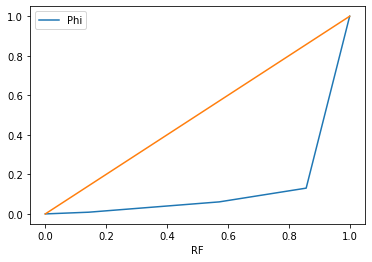

In [74]:
df.plot(x='RF',y='Phi')
plt.plot((0,1),(0,1))

In [75]:
df['Phi'][:-1].values

array([0.        , 0.00869565, 0.02608696, 0.04347826, 0.06086957,
       0.09565217, 0.13043478])

In [76]:
df['Phi'][:-1].values

array([0.        , 0.00869565, 0.02608696, 0.04347826, 0.06086957,
       0.09565217, 0.13043478])

$$\Sigma \Phi_n = \Phi_n + \Phi_{n-1}$$

In [77]:
SPhi = df['Phi'][1:].values + df['Phi'][:-1].values

In [78]:
SPhi

array([0.00869565, 0.03478261, 0.06956522, 0.10434783, 0.15652174,
       0.22608696, 1.13043478])

In [79]:
SPhi = np.insert(SPhi, 0, 0.0)

In [80]:
SPhi

array([0.        , 0.00869565, 0.03478261, 0.06956522, 0.10434783,
       0.15652174, 0.22608696, 1.13043478])

In [81]:
df['SPhi'] = SPhi

In [82]:
df

x       Phi        RF      SPhi
0      0  0.000000  0.000000  0.000000
1    500  0.008696  0.142857  0.008696
2   1000  0.026087  0.285714  0.034783
3   1000  0.043478  0.428571  0.069565
4   1000  0.060870  0.571429  0.104348
5   2000  0.095652  0.714286  0.156522
6   2000  0.130435  0.857143  0.226087
7  50000  1.000000  1.000000  1.130435

$$\Delta RF_n = RF_n - RF_{n-1}$$

In [83]:
DRF = df['RF'][1:].values - df['RF'][0:-1].values

In [84]:
DRF = np.insert(DRF, 0, 0.0)

In [85]:
df['DRF'] = DRF

In [86]:
df

x       Phi        RF      SPhi       DRF
0      0  0.000000  0.000000  0.000000  0.000000
1    500  0.008696  0.142857  0.008696  0.142857
2   1000  0.026087  0.285714  0.034783  0.142857
3   1000  0.043478  0.428571  0.069565  0.142857
4   1000  0.060870  0.571429  0.104348  0.142857
5   2000  0.095652  0.714286  0.156522  0.142857
6   2000  0.130435  0.857143  0.226087  0.142857
7  50000  1.000000  1.000000  1.130435  0.142857

In [87]:
df['SPhi_DRF'] = df['SPhi'] * df['DRF']

In [88]:
df

x       Phi        RF      SPhi       DRF  SPhi_DRF
0      0  0.000000  0.000000  0.000000  0.000000  0.000000
1    500  0.008696  0.142857  0.008696  0.142857  0.001242
2   1000  0.026087  0.285714  0.034783  0.142857  0.004969
3   1000  0.043478  0.428571  0.069565  0.142857  0.009938
4   1000  0.060870  0.571429  0.104348  0.142857  0.014907
5   2000  0.095652  0.714286  0.156522  0.142857  0.022360
6   2000  0.130435  0.857143  0.226087  0.142857  0.032298
7  50000  1.000000  1.000000  1.130435  0.142857  0.161491

In [89]:
Gini = 1 - df['SPhi_DRF'].sum()

In [90]:
Gini

0.7527950310559006